In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import missingno as msno
import re
from tqdm import tqdm

In [5]:
df_x_ray_metdata = pd.read_csv("Table_xraymetadata.csv",encoding='iso-8859-1')

In [6]:
df_x_ray_metdata.head()

,id,file_id,date,xray_no,patient_complaint,xray_type,created_on,created_by,updated_on,updated_by,Deleted_on,Deleted_by,age,gender,not_repo_comment,last_message,message_thread,center_last_message,center_message_thread
0,1,1,2019-06-28 00:00:00,121X,Pain,Chest,2019-06-08 22:39:53,perspicio_cli,2019-06-08 22:39:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,2019-06-28 00:00:00,4,Pain,Skull,2019-06-08 22:47:39,perspicio_cli,2019-06-08 22:47:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,2019-06-07 00:00:00,2,Pain,Elbows Both,2019-06-08 22:47:39,perspicio_cli,2019-06-08 22:47:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,2019-06-22 00:00:00,6,Pain,Wrists Both,2019-06-08 22:47:39,perspicio_cli,2019-06-08 22:47:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,2019-06-28 00:00:00,8,Pain,Spine,2019-06-08 22:47:39,perspicio_cli,2019-06-08 22:47:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

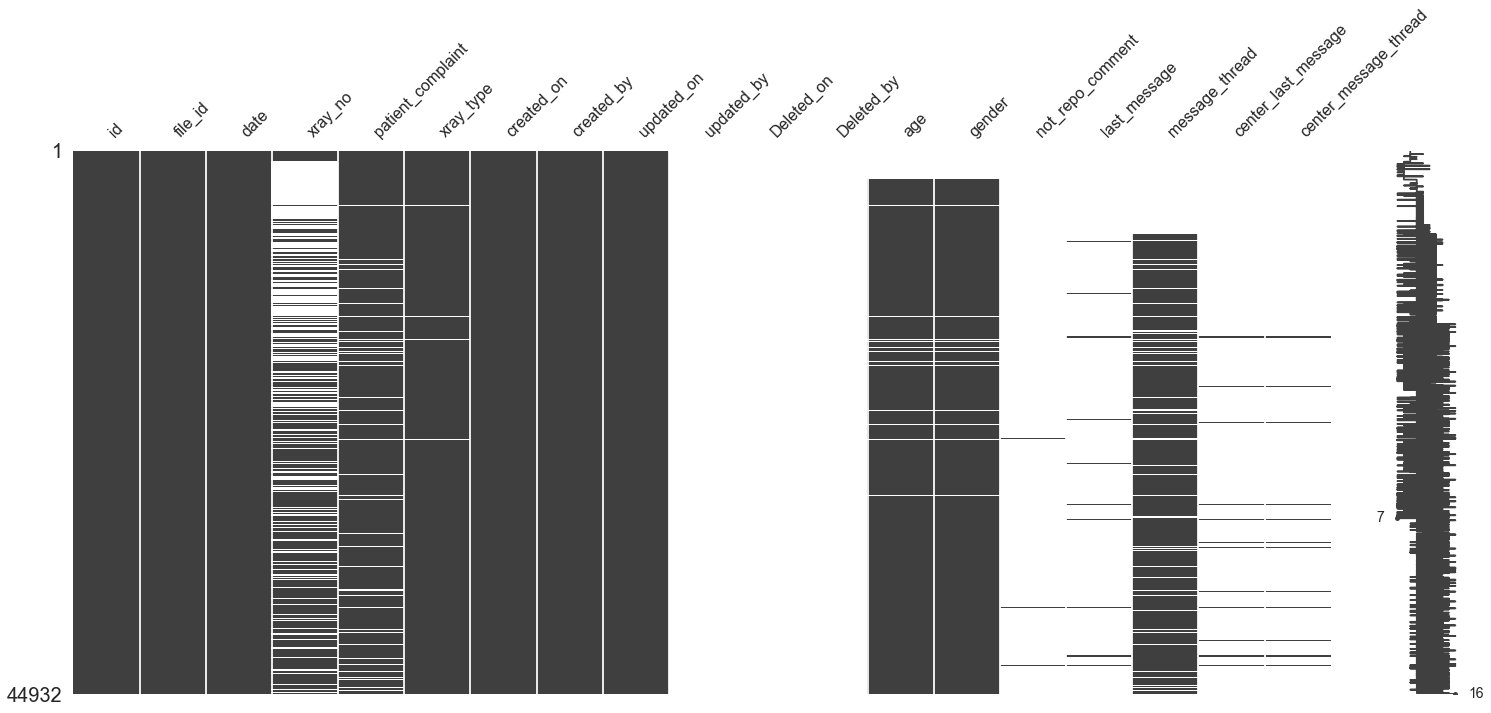

In [7]:
msno.matrix(df_x_ray_metdata)

In [8]:
for i in df_x_ray_metdata.columns:
    if (df_x_ray_metdata[i].isnull().sum()/len(df_x_ray_metdata)*100)>50:
        print("{0}:{1}".format(i,df_x_ray_metdata[i].isnull().sum()/len(df_x_ray_metdata)*100))

updated_by:100.0
Deleted_on:100.0
Deleted_by:100.0
not_repo_comment:99.14314964835752
last_message:96.98433187928424
center_last_message:97.55630730882223
center_message_thread:97.55630730882223


In [9]:
df_x_ray_metdata.drop(columns=['updated_by','Deleted_on','Deleted_by'],inplace=True)

In [10]:
len(df_x_ray_metdata.not_repo_comment[df_x_ray_metdata.not_repo_comment.notnull()==True].unique())

270

In [11]:
len(df_x_ray_metdata.last_message[df_x_ray_metdata.last_message.notnull()==True].unique())

844

In [12]:
df_x_ray_metdata.drop(columns=['center_message_thread','center_last_message','last_message','not_repo_comment'],inplace=True)

In [13]:
df_x_ray_metdata.gender.isnull().sum()/len(df_x_ray_metdata)

0.06825870203863617

In [14]:
df_x_ray_metdata.loc[:,['age','gender','message_thread']]

,age,gender,message_thread
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
44927,24 YRS,Female,"<div class=""msg sysmsg"">The File Has Been Repo..."
44928,70,Male,"<div class=""msg sysmsg"">The File Has Been Repo..."
44929,28Y,Male,"<div class=""msg sysmsg"">The File Has Been Repo..."
44930,39,Female,"<div class=""msg sysmsg"">The File Has Been Repo..."


In [15]:
[re.sub("\D","",str(i)) for i in df_x_ray_metdata.age if i is not np.NaN]

['65',
 '',
 '',
 '51',
 '35',
 '45',
 '56',
 '32',
 '23',
 '2713',
 '36',
 '32',
 '28',
 '65',
 '66',
 '50',
 '48',
 '68',
 '45',
 '60',
 '23',
 '6',
 '69',
 '47',
 '32',
 '69',
 '47',
 '28',
 '89',
 '89',
 '80',
 '57',
 '82',
 '70',
 '38',
 '79',
 '71',
 '43',
 '53',
 '57',
 '57',
 '57',
 '79',
 '25',
 '35',
 '60',
 '84',
 '50',
 '25',
 '20',
 '6',
 '23',
 '24',
 '6',
 '15',
 '82',
 '3',
 '21',
 '32',
 '66',
 '42',
 '49',
 '51',
 '62',
 '61',
 '32',
 '48',
 '1',
 '50',
 '50',
 '12',
 '48',
 '35',
 '68',
 '68',
 '52',
 '73',
 '29',
 '51',
 '17',
 '65',
 '76',
 '40',
 '28',
 '30',
 '82',
 '60',
 '52',
 '60',
 '38',
 '25',
 '78',
 '72',
 '24',
 '38',
 '82',
 '35',
 '38',
 '38',
 '38',
 '38',
 '38',
 '70',
 '12',
 '40',
 '2',
 '27',
 '27',
 '27',
 '60',
 '32',
 '80',
 '17',
 '24',
 '58',
 '19',
 '19',
 '48',
 '22',
 '40',
 '32',
 '40',
 '27',
 '35',
 '45',
 '45',
 '3',
 '8',
 '2',
 '71',
 '7',
 '3',
 '16',
 '38',
 '65',
 '60',
 '51',
 '82',
 '27',
 '74',
 '38',
 '70',
 '70',
 '70',
 '8',

In [16]:
df_x_ray_metdata.age = df_x_ray_metdata.age.apply(lambda x :re.sub("\D","",str(x)) if x is not np.NaN else -1)

<AxesSubplot:>

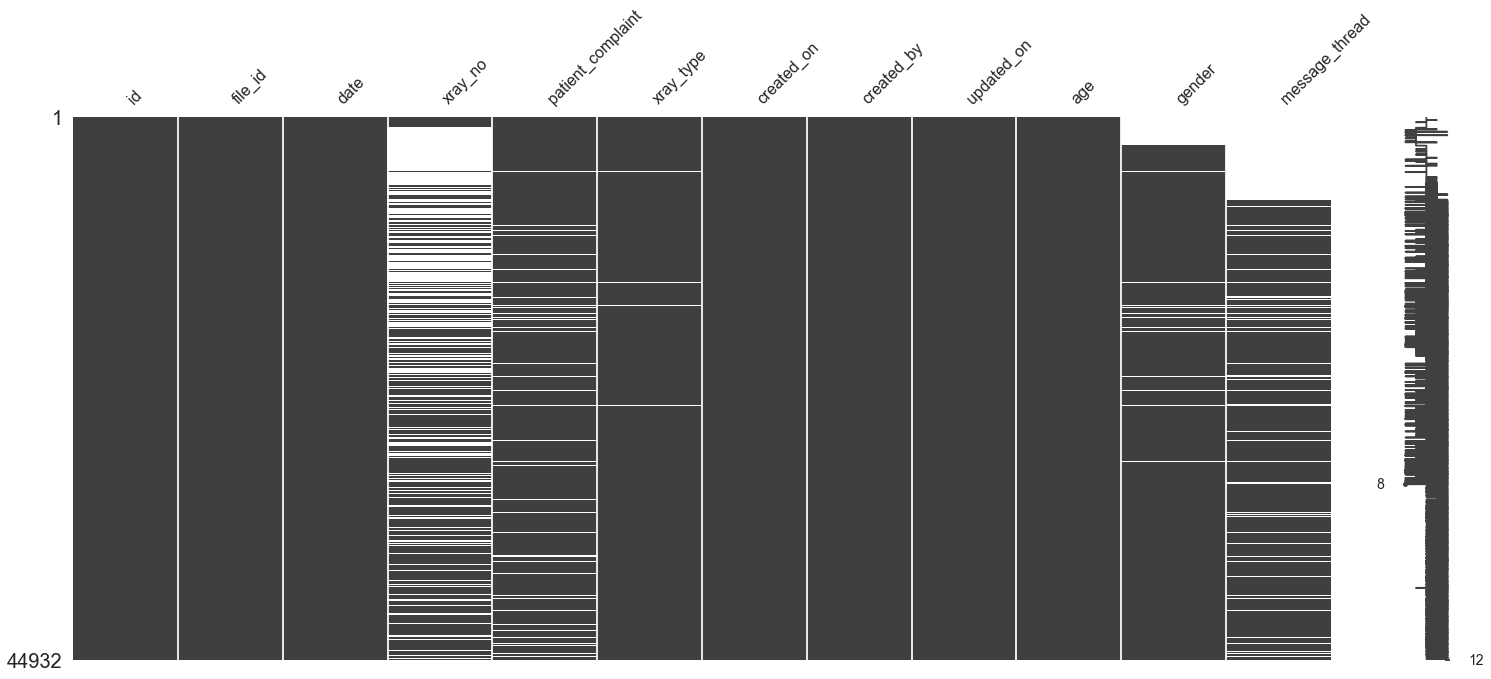

In [17]:
msno.matrix(df_x_ray_metdata)

In [18]:
import random
print(random.randrange(0,2))

0


In [19]:
for i in tqdm(range(0,len(df_x_ray_metdata))):
    randomNo = random.randrange(0,2)
    if df_x_ray_metdata.gender[i] is np.NaN:
        if randomNo is 0:
            df_x_ray_metdata.loc[i,'gender']='Male'
        else:
            df_x_ray_metdata.loc[i,'gender']='Female'

100%|█████████████████████████████████████████████████████████████████████████████████| 44932/44932 [00:02<00:00, 18496.05it/s]


In [20]:
df_x_ray_metdata.gender.value_counts()

Male      24754
Female    20118
Other        47
O            13
Name: gender, dtype: int64

In [40]:
# len(df_x_ray_metdata[df_x_ray_metdata.loc[:,'gender']=='Other'])
df_x_ray_metdata.gender[df_x_ray_metdata.gender=='Other'] = 'O'

C:\Users\No Name\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
len(df_x_ray_metdata[df_x_ray_metdata.loc[:,'gender']=='O'])

60

In [44]:
df_x_ray_metdata.isnull().sum()[df_x_ray_metdata.isnull().sum()>0]

date                     3
xray_no              19804
patient_complaint     2698
xray_type              315
message_thread        9912
dtype: int64

In [45]:
df_x_ray_metdata.xray_type.fillna("N/A",inplace=True)

In [46]:
df_x_ray_metdata.xray_type.isna().sum()

0

In [47]:
df_x_ray_metdata.xray_no.fillna("N/A",inplace=True)

In [48]:
df_x_ray_metdata.xray_no.isna().sum()

0

In [49]:
df_x_ray_metdata

,id,file_id,date,xray_no,patient_complaint,xray_type,created_on,created_by,updated_on,age,gender,message_thread
0,1,1,2019-06-28 00:00:00,121X,Pain,Chest,2019-06-08 22:39:53,perspicio_cli,2019-06-08 22:39:53,-1,Male,NaN
1,2,2,2019-06-28 00:00:00,4,Pain,Skull,2019-06-08 22:47:39,perspicio_cli,2019-06-08 22:47:39,-1,Male,NaN
2,3,3,2019-06-07 00:00:00,2,Pain,Elbows Both,2019-06-08 22:47:39,perspicio_cli,2019-06-08 22:47:39,-1,Female,NaN
3,4,4,2019-06-22 00:00:00,6,Pain,Wrists Both,2019-06-08 22:47:39,perspicio_cli,2019-06-08 22:47:39,-1,Female,NaN
4,5,5,2019-06-28 00:00:00,8,Pain,Spine,2019-06-08 22:47:39,perspicio_cli,2019-06-08 22:47:39,-1,Female,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
44927,45067,57779,2020-08-03 00:00:00,5097,ADMIT,Hand Right,2020-08-03 11:12:20,Chamunda_1,2020-08-03 11:48:56,24,Female,"<div class=""msg sysmsg"">The File Has Been Repo..."
44928,45068,57766,2020-08-03 00:00:00,N/A,PAIN,Chest PA,2020-08-03 11:34:52,SK_1,2020-08-03 11:50:02,70,Male,"<div class=""msg sysmsg"">The File Has Been Repo..."
44929,45062,57774,2020-08-03 00:00:00,N/A,CKD ON HD,Chest PA,2020-08-03 11:07:09,Mallika_Hospital_1,2020-08-03 11:50:31,28,Male,"<div class=""msg sysmsg"">The File Has Been Repo..."
44930,45069,57780,2020-08-03 00:00:00,N/A,Covid 19,Chest PA,2020-08-03 11:41:00,Shakti_1,2020-08-03 11:51:21,39,Female,"<div class=""msg sysmsg"">The File Has Been Repo..."


In [50]:
df_x_ray_metdata.iloc[1553:1556]

,id,file_id,date,xray_no,patient_complaint,xray_type,created_on,created_by,updated_on,age,gender,message_thread
1553,1560,3356,2019-09-16 00:00:00,N/A,"FEVER,DENGUE POSITIVE",Chest,2019-09-20 10:19:09,DNA_Hospital_1,2019-09-20 10:19:09,-1,Male,NaN
1554,1561,3357,NaN,N/A,DENGUE FEVER,Chest,2019-09-20 10:19:09,DNA_Hospital_1,2019-09-20 10:19:09,-1,Male,NaN
1555,1562,3359,2019-09-18 00:00:00,N/A,DENGUE FEVER,Chest,2019-09-20 10:19:09,DNA_Hospital_1,2019-09-20 10:19:09,-1,Male,NaN


In [51]:
df_x_ray_metdata.drop([1554,34190,42337],axis='index',inplace=True)

In [52]:
df_x_ray_metdata.message_thread.fillna("N/A",inplace=True)
df_x_ray_metdata.patient_complaint.fillna("N/A",inplace=True)

In [62]:
df_x_ray_metdata.isna().sum()

id                   0
file_id              0
date                 0
xray_no              0
patient_complaint    0
xray_type            0
created_on           0
created_by           0
updated_on           0
age                  0
gender               0
message_thread       0
dtype: int64

<AxesSubplot:>

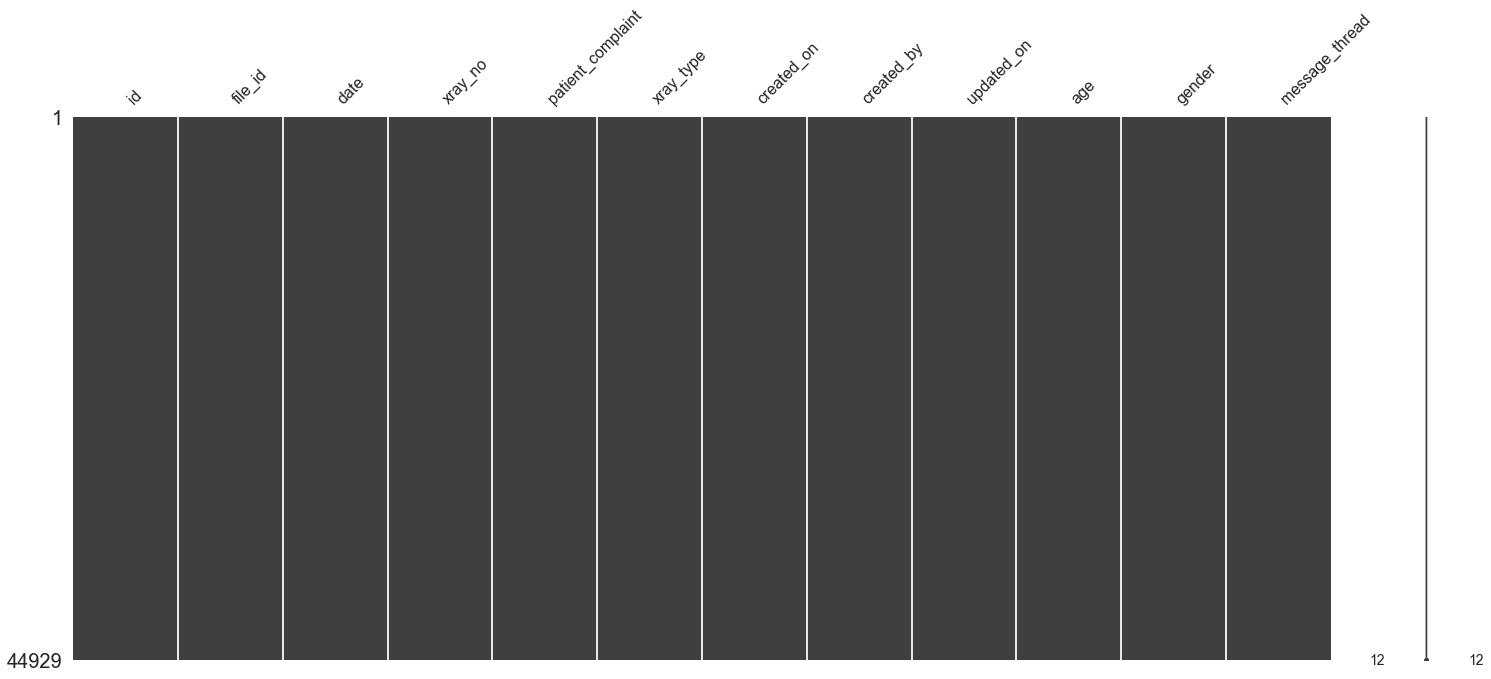

In [53]:
msno.matrix(df_x_ray_metdata)

In [54]:
del_col = pd.read_csv("Table_xraymetadata.csv",encoding='iso-8859-1')

In [55]:
del_col.columns

Index(['id', 'file_id', 'date', 'xray_no', 'patient_complaint', 'xray_type',
       'created_on', 'created_by', 'updated_on', 'updated_by', 'Deleted_on',
       'Deleted_by', 'age', 'gender', 'not_repo_comment', 'last_message',
       'message_thread', 'center_last_message', 'center_message_thread'],
      dtype='object')

In [56]:
df_x_ray_metdata.columns

Index(['id', 'file_id', 'date', 'xray_no', 'patient_complaint', 'xray_type',
       'created_on', 'created_by', 'updated_on', 'age', 'gender',
       'message_thread'],
      dtype='object')

In [57]:
for i in tqdm(del_col.columns):
    if i not in df_x_ray_metdata.columns:
        print(i)

100%|███████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 19060.46it/s]

updated_by
Deleted_on
Deleted_by
not_repo_comment
last_message
center_last_message
center_message_thread


In [65]:
df_x_ray_metdata.sample(10)

,id,file_id,date,xray_no,patient_complaint,xray_type,created_on,created_by,updated_on,age,gender,message_thread
30653,30245,39318,2020-06-20 00:00:00,3268,BREATHLESSNESS 4 DAYS,Chest PA,2020-06-20 08:32:19,NHDC_1,2020-06-20 08:36:54,28,Female,"<div class=""msg sysmsg"">The File Has Been Repo..."
34409,34082,44278,2020-07-02 00:00:00,19422,COVID POSSITIVE,Chest PA,2020-07-02 06:16:47,Shree_Sai_0,2020-07-02 06:20:18,71,Female,"<div class=""msg sysmsg"">The File Has Been Repo..."
29192,28720,37608,2020-06-16 00:00:00,R-339,Cough,Chest PA,2020-06-16 05:32:45,Gayatri_1,2020-06-16 08:24:10,38,Female,"<div class=""msg sysmsg"">The File Has Been Repo..."
10070,9857,14932,2020-02-08 00:00:00,N/A,Breathless,Chest,2020-02-08 13:18:29,Nishit_1,2020-02-08 13:25:54,87,Male,"<div class=""msg sysmsg"">The File Has Been Repo..."
30741,30323,39413,2020-06-20 00:00:00,4532,FALLING DOWN,Ankle Right,2020-06-20 11:06:47,Chamunda_1,2020-06-20 11:35:19,90,Female,"<div class=""msg sysmsg"">The File Has Been Repo..."
17424,17508,24487,2020-04-09 00:00:00,N/A,"AFI,CKD,HTN",Chest PA,2020-04-09 05:09:41,Aghila_Portable,2020-04-09 05:58:21,50,Male,"<div class=""msg sysmsg"">The File Has Been Repo..."
3538,17355,24304,2020-04-07 00:00:00,0,N/A,N/A,2020-04-07 06:09:52,CSK_1,2020-04-07 06:09:52,-1,Male,N/A
18905,18751,25924,2020-04-25 00:00:00,N/A,KOCHS RT,Chest PA,2020-04-25 06:57:47,GDC_2,2020-04-25 07:43:15,30,Male,"<div class=""msg sysmsg"">The File Has Been Repo..."
25878,25746,34279,2020-06-07 00:00:00,1,FEVER COUGH,Chest PA,2020-06-07 07:13:32,GDC_1,2020-06-07 07:37:56,55,Female,"<div class=""msg sysmsg"">The File Has Been Repo..."
40421,39691,50924,2020-07-18 00:00:00,N/A,TB SINCE 9 MONTH,Chest PA,2020-07-18 10:58:27,Drone_1,2020-07-18 11:02:59,15,Female,"<div class=""msg sysmsg"">The File Has Been Repo..."


In [66]:
df_x_ray_metdata.to_excel("final_x_ray_metadata.xlsx",index=False)

In [68]:
metadata = pd.read_excel("final_x_ray_metadata.xlsx")

In [74]:
# metadata.replace(to_replace=np.NaN,value='na')
metadata.dropna().to_excel("final_metadata_removed_null.xlsx",index=False)

In [71]:
metadata.sample(10)

,id,file_id,date,xray_no,patient_complaint,xray_type,created_on,created_by,updated_on,age,gender,message_thread
22813,23216,31155,2020-05-29 00:00:00,NaN,COUGH,Chest PA,2020-05-29 07:43:41,SDC_1,2020-05-29 09:04:47,22.0,Female,"<div class=""msg sysmsg"">The File Has Been Repo..."
33619,33373,43052,2020-06-30 00:00:00,200,FALL,Hand Left,2020-06-30 06:32:14,PMC_1,2020-06-30 07:48:44,14.0,Male,"<div class=""msg sysmsg"">The File Has Been Repo..."
22533,22124,29938,2020-05-24 00:00:00,17594,COVID POSSITIVE,Chest AP,2020-05-24 07:05:40,Shree_Sai_0,2020-05-24 07:45:47,47.0,Male,"<div class=""msg sysmsg"">The File Has Been Repo..."
3250,3257,6343,2019-11-15 00:00:00,NaN,H/O BREATHLESSNESS,Chest,2019-11-15 05:55:20,Aghila_Portable,2019-11-15 05:55:20,70.0,Male,NaN
43424,42449,54155,2020-07-26 00:00:00,20078,COVID POSSITIVE,Chest PA,2020-07-26 08:13:33,Shree_Sai_0,2020-07-26 13:10:50,41.0,Male,"<div class=""msg sysmsg"">The File Has Been Repo..."
21796,21512,29260,2020-05-21 00:00:00,NaN,PAIN,Spine Cervical,2020-05-21 08:16:58,GDC_2,2020-05-21 08:20:51,56.0,Female,"<div class=""msg sysmsg"">The File Has Been Repo..."
558,557,1896,2019-08-07 00:00:00,6,Injury Pain Old #,Chest,2019-08-07 07:11:29,Ashwini_1,2019-08-07 07:11:29,-1.0,Female,NaN
9680,9484,14443,2020-02-06 00:00:00,NaN,ACCIDENTAL,Leg Left,2020-02-06 08:02:39,GDC_2,2020-02-06 08:38:09,10.0,Male,"<div class=""msg sysmsg"">The File Has Been Repo..."
5197,5194,8960,2019-12-17 00:00:00,NaN,RIGHT SIDE PAIN 1 WEEK,Chest,2019-12-17 11:23:17,Drone_1,2019-12-17 11:23:17,24.0,Female,NaN
43360,42500,54225,2020-07-26 00:00:00,R 57,COUGH FEVER,Chest PA,2020-07-26 09:58:36,Swastik_1,2020-07-26 13:24:53,44.0,Male,"<div class=""msg sysmsg"">The File Has Been Repo..."


### Which client create more requests

In [4]:
plt.bar(metadata.created_by)

TypeError: bar() missing 1 required positional argument: 'height'

In [79]:
file_tab = pd.read_excel("final_table_file.xlsx")

In [83]:
file_tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26015 entries, 0 to 26014
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    26015 non-null  int64         
 1   username              26015 non-null  object        
 2   status                26015 non-null  object        
 3   assigned_to           26015 non-null  object        
 4   created_on            26015 non-null  object        
 5   created_by            26015 non-null  object        
 6   updated_on            26015 non-null  object        
 7   updated_by            26015 non-null  object        
 8   group_id              26015 non-null  int64         
 9   image_type            26015 non-null  object        
 10  shoot_id              26015 non-null  int64         
 11  rejected_by           26015 non-null  object        
 12  RAS_count             26015 non-null  int64         
 13  reporting_extend

In [82]:
file_tab.reporting_time_limit = pd.to_datetime(file_tab.reporting_time_limit)

In [85]:
file_tab.groupby('assigned_to')['reporting_time_limit'].mean()

DataError: No numeric types to aggregate

In [86]:
new_df_table_file = pd.read_csv("Table_Files.csv")

In [87]:
new_df_table_file.isnull().sum()

id                          0
username                    0
status                      0
assigned_to                 0
created_on                  0
created_by               9337
updated_on                  0
updated_by               4006
Deleted_on              57607
Deleted_by              57607
group_id                    0
image_type                  0
shoot_id                    0
og_reported_by          57562
second_opinion          57518
rejected_by                 0
RAS_count                   0
reporting_extended          0
reporting_time_limit    31592
dtype: int64

In [88]:
new_df_table_file.describe()

,id,Deleted_on,Deleted_by,group_id,shoot_id,RAS_count,reporting_extended
count,57607.000000,0.0,0.0,57607.000000,57607.000000,57607.000000,57607.000000
mean,28880.972417,NaN,NaN,20355.244814,8.367646,1.011683,0.000052
std,16704.592669,NaN,NaN,14022.397036,57.990662,0.109850,0.007216
min,1.000000,NaN,NaN,0.000000,0.000000,1.000000,0.000000
25%,14402.500000,NaN,NaN,7649.500000,0.000000,1.000000,0.000000
50%,28804.000000,NaN,NaN,19843.000000,0.000000,1.000000,0.000000
75%,43380.500000,NaN,NaN,32691.000000,0.000000,1.000000,0.000000
max,57782.000000,NaN,NaN,45070.000000,420.000000,4.000000,1.000000


In [89]:
new_df_table_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57607 entries, 0 to 57606
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    57607 non-null  int64  
 1   username              57607 non-null  object 
 2   status                57607 non-null  object 
 3   assigned_to           57607 non-null  object 
 4   created_on            57607 non-null  object 
 5   created_by            48270 non-null  object 
 6   updated_on            57607 non-null  object 
 7   updated_by            53601 non-null  object 
 8   Deleted_on            0 non-null      float64
 9   Deleted_by            0 non-null      float64
 10  group_id              57607 non-null  int64  
 11  image_type            57607 non-null  object 
 12  shoot_id              57607 non-null  int64  
 13  og_reported_by        45 non-null     object 
 14  second_opinion        89 non-null     object 
 15  rejected_by        

In [118]:
# new_df_table_file[new_df_table_file.status.isin(['processed','viewed','metadata'])]
new_df_table_file[new_df_table_file.image_type=='xray'].loc[new_df_table_file.status.isin(['processed','viewed','metadata'])]

,id,username,status,assigned_to,created_on,created_by,updated_on,updated_by,Deleted_on,Deleted_by,group_id,image_type,shoot_id,og_reported_by,second_opinion,rejected_by,RAS_count,reporting_extended,reporting_time_limit
0,57703,Drone_1,processed,Dr_Ravi_Chavan,2020-08-03 08:54:23,Drone_1,2020-08-03 09:32:10,Dr_Ravi_Chavan,NaN,NaN,45011,xray,0,NaN,NaN,None,1,0,2020-08-03 10:01:31
1,57608,Gayatri_1,viewed,Dr_Ravi_Chavan,2020-08-03 07:21:04,Gayatri_1,2020-08-03 07:27:03,Gayatri_1,NaN,NaN,44901,xray,0,NaN,NaN,None,1,0,2020-08-03 07:57:16
2,57614,Gayatri_1,viewed,Dr_Ravi_Chavan,2020-08-03 07:25:29,Gayatri_1,2020-08-03 09:18:05,Gayatri_1,NaN,NaN,44907,xray,0,NaN,NaN,None,1,0,2020-08-03 09:46:14
3,57657,Gayatri_1,viewed,Dr_Ravi_Chavan,2020-08-03 07:40:10,Gayatri_1,2020-08-03 07:56:34,Gayatri_1,NaN,NaN,44956,xray,0,NaN,NaN,None,1,0,2020-08-03 08:25:49
4,57714,GMC_1,viewed,Dr_Ravi_Chavan,2020-08-03 08:52:00,GMC_1,2020-08-03 09:32:39,GMC_1,NaN,NaN,45004,xray,0,NaN,NaN,None,1,0,2020-08-03 10:01:31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57602,57650,SDC_1,viewed,Dr_Nikunj_Kothia,2020-08-03 07:36:53,SDC_1,2020-08-03 09:20:23,SDC_1,NaN,NaN,44953,xray,0,NaN,NaN,None,1,0,2020-08-03 09:49:04
57603,57700,Drone_1,processed,Dr_Ravi_Chavan,2020-08-03 08:54:23,Drone_1,2020-08-03 09:28:45,Dr_Ravi_Chavan,NaN,NaN,45009,xray,0,NaN,NaN,None,1,0,2020-08-03 09:55:46
57604,57616,Atharv_1,viewed,Dr_Nikunj_Kothia,2020-08-03 07:34:24,Atharv_1,2020-08-03 09:24:01,Atharv_1,NaN,NaN,44943,xray,0,NaN,NaN,None,1,0,2020-08-03 09:51:18
57605,57613,Chamunda_1,viewed,Dr_Ravi_Chavan,2020-08-03 07:26:32,Chamunda_1,2020-08-03 09:20:43,Chamunda_1,NaN,NaN,44908,xray,0,NaN,NaN,None,1,0,2020-08-03 09:48:14


In [99]:
new_df_table_file.status.unique()

array(['processed', 'viewed', 'org-viewed', 'ignored', 'ct', 'metadata',
       'mr', 'rejected', 'org-processed', 'uploaded', 'org-uploaded',
       'org-metadata', 'org-rejected'], dtype=object)